In [20]:
from typing import Optional

import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.cm import ScalarMappable
from sklearn.decomposition import PCA
from ucimlrepo import fetch_ucirepo

TARGET_VARIABLE = "Concrete compressive strength"
NORMALIZE = False


def plot_principal_component_variance(_data: pd.DataFrame, num_components: Optional[int] = None) -> None:
    _data = _data.drop(columns=[TARGET_VARIABLE])
    num_components = len(_data.columns) if num_components is None else num_components
    _pca = PCA(n_components=num_components)
    _pca.fit(_data)

    explained_variance = _pca.explained_variance_ratio_ * 100

    plt.figure(figsize=(12, 8))
    plt.bar(range(1, num_components + 1), explained_variance)
    plt.xlabel("Principal Component")
    plt.ylabel("Percentage of Variance Explained")
    plt.title("Percentage of Variance Explained by Principal Components")
    plt.xticks(range(1, num_components + 1))

    print("Percentage of Variance Explained by Principal Components:")
    for component, variance in enumerate(explained_variance, start=1):
        plt.text(component, variance, f'{variance:.2f}%', ha="center", va="bottom")
        print(f"\t Component {component}: {variance:.3f} %")

    print(f"Total Percentage Variance Explained by {num_components} Components: {sum(explained_variance):.2f} %")
    plt.show()


def plot_pca(_components: pd.DataFrame, _target: pd.Series) -> None:
    _, ax = plt.subplots(figsize=(12, 8))
    ax.scatter(_components[:, 0], _components[:, 1], c=_target, cmap="RdYlGn")
    ax.set_xlabel("Principal Component 1")
    ax.set_ylabel("Principal Component 2")
    ax.set_title("Scatter Plot of Two Principal Components")
    ax.grid(True)

    sm = ScalarMappable(cmap="RdYlGn")
    sm.set_array(_target)
    cbar = plt.colorbar(sm, label=TARGET_VARIABLE, ax=ax)
    cbar.set_label(TARGET_VARIABLE, fontsize=12)
    plt.show()

In [21]:
concrete_compressive_strength = fetch_ucirepo(id=165)
concrete_compressive_strength.variables

,name,role,type,demographic,description,units,missing_values
0,Cement,Feature,Continuous,None,None,kg/m^3,no
1,Blast Furnace Slag,Feature,Integer,None,None,kg/m^3,no
2,Fly Ash,Feature,Continuous,None,None,kg/m^3,no
3,Water,Feature,Continuous,None,None,kg/m^3,no
4,Superplasticizer,Feature,Continuous,None,None,kg/m^3,no
5,Coarse Aggregate,Feature,Continuous,None,None,kg/m^3,no
6,Fine Aggregate,Feature,Continuous,None,None,kg/m^3,no
7,Age,Feature,Integer,None,None,day,no
8,Concrete compressive strength,Target,Continuous,None,None,MPa,no


In [22]:
features = concrete_compressive_strength.data.features
targets = concrete_compressive_strength.data.targets
dataset = pd.concat([features, targets], axis=1)
dataset = (dataset - dataset.mean()) / dataset.std() if NORMALIZE else dataset
dataset.describe().round(2)

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Concrete compressive strength
count,1030.00,1030.00,1030.00,1030.00,1030.00,1030.00,1030.00,1030.00,1030.00
mean,281.17,73.90,54.19,181.57,6.20,972.92,773.58,45.66,35.82
std,104.51,86.28,64.00,21.35,5.97,77.75,80.18,63.17,16.71
min,102.00,0.00,0.00,121.80,0.00,801.00,594.00,1.00,2.33
25%,192.38,0.00,0.00,164.90,0.00,932.00,730.95,7.00,23.71
50%,272.90,22.00,0.00,185.00,6.40,968.00,779.50,28.00,34.44
75%,350.00,142.95,118.30,192.00,10.20,1029.40,824.00,56.00,46.14
max,540.00,359.40,200.10,247.00,32.20,1145.00,992.60,365.00,82.60


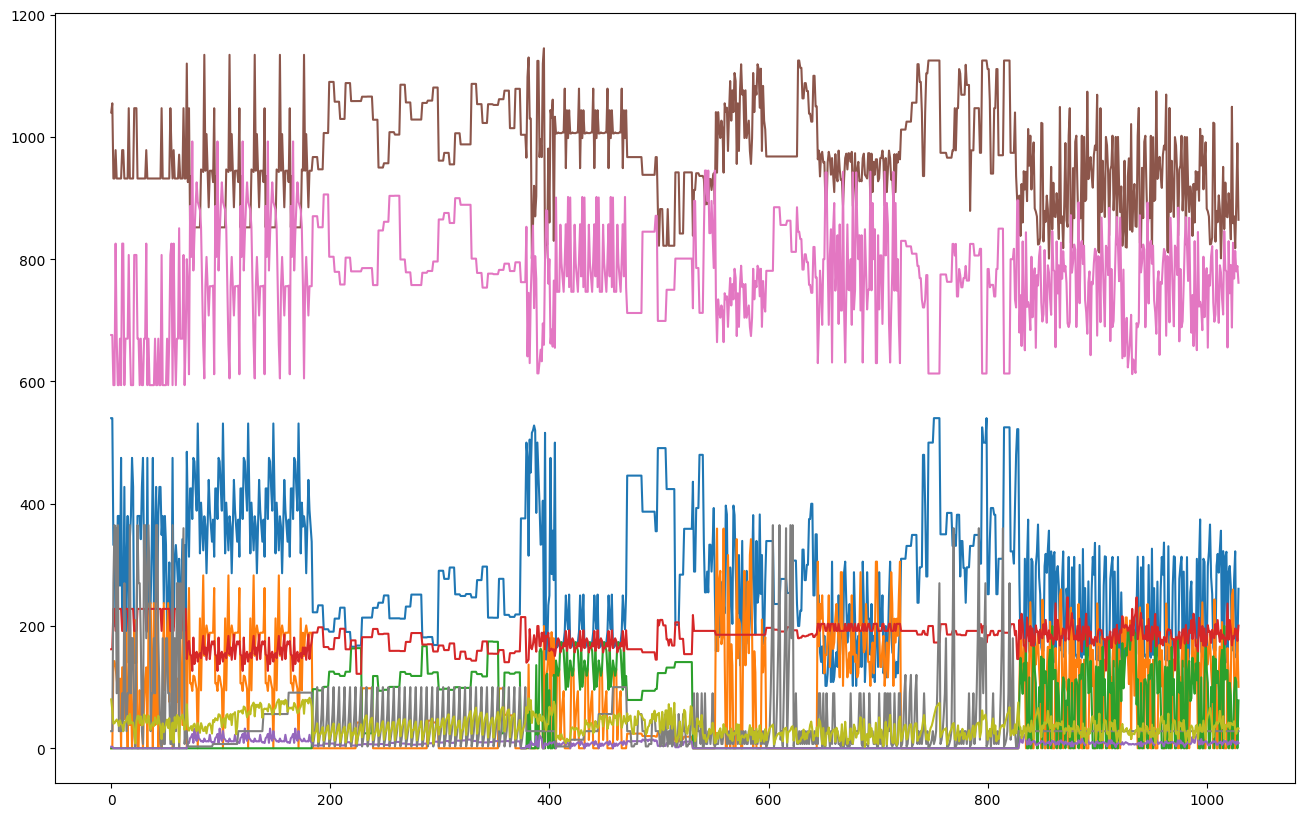

In [23]:
dataset.plot(figsize=(16, 10), legend=False);

Percentage of Variance Explained by Principal Components:
	 Component 1: 32.577 %
	 Component 2: 24.887 %
	 Component 3: 18.480 %
	 Component 4: 10.766 %
	 Component 5: 10.095 %
	 Component 6: 2.985 %
	 Component 7: 0.182 %
	 Component 8: 0.029 %
Total Percentage Variance Explained by 8 Components: 100.00 %


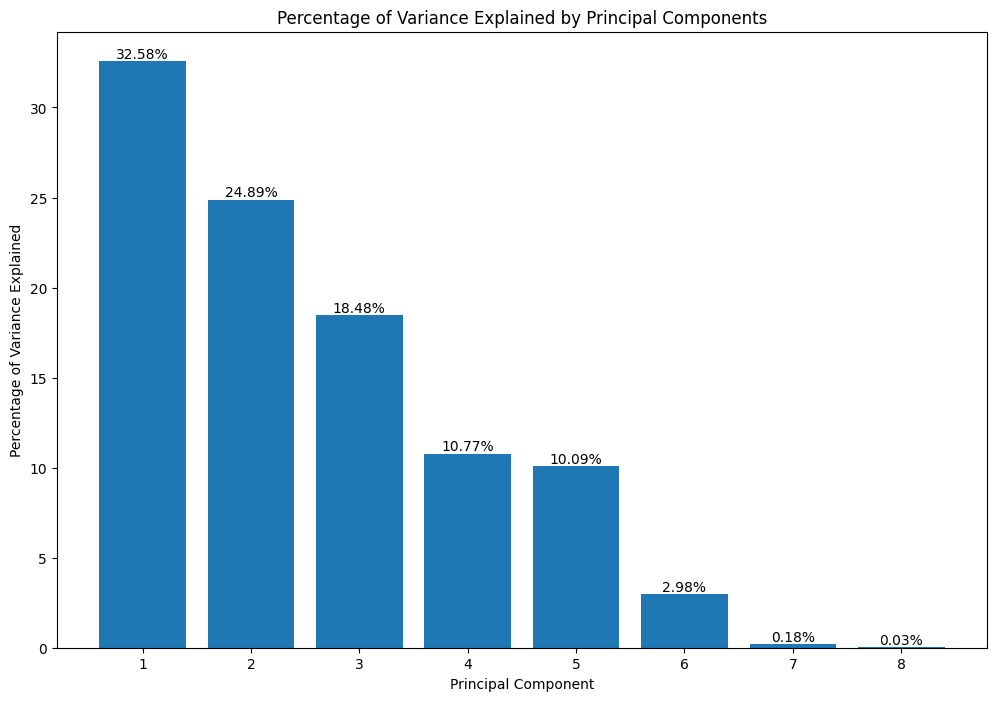

In [24]:
plot_principal_component_variance(dataset)

Percentage of Variance Explained by Principal Components:
	 Component 1: 32.577 %
	 Component 2: 24.887 %
Total Percentage Variance Explained by 2 Components: 57.46 %


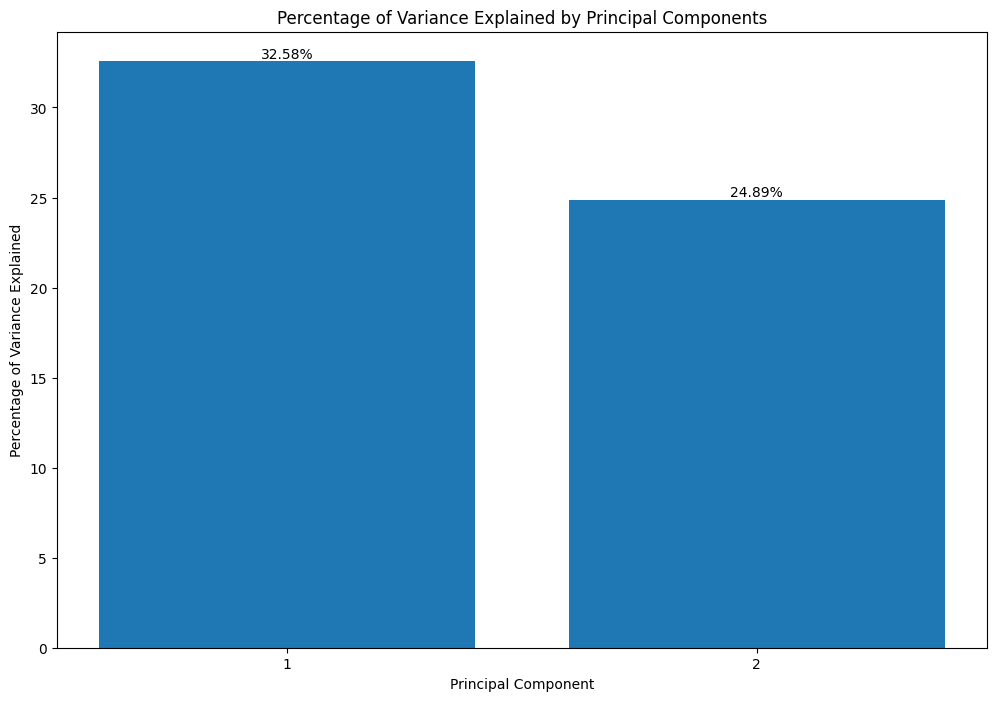

In [25]:
plot_principal_component_variance(dataset, num_components=2)

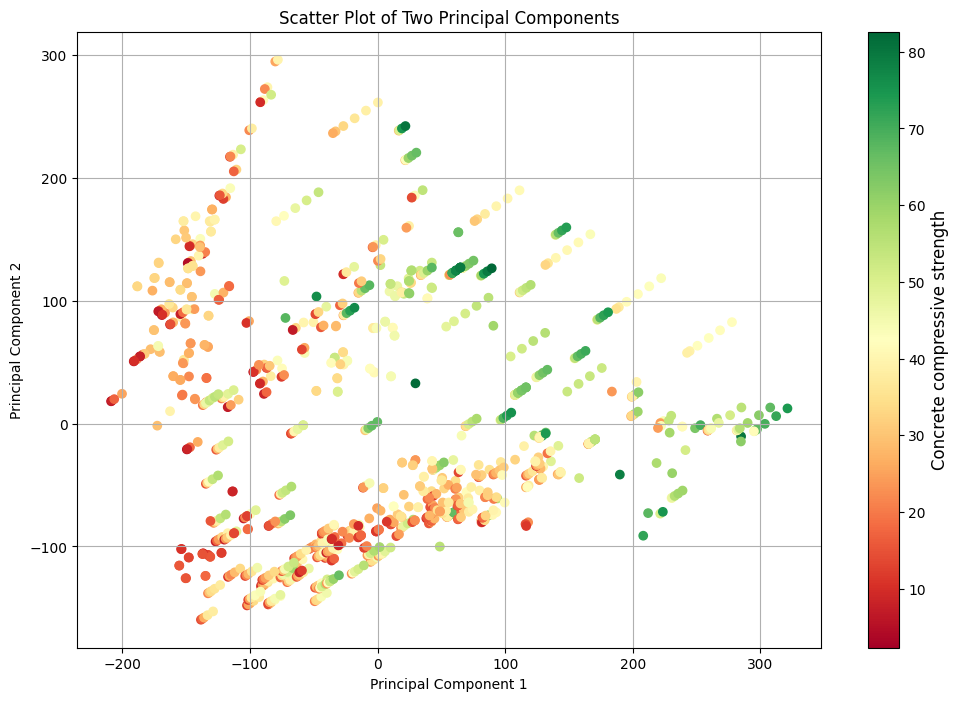

In [26]:
x = dataset.drop(columns=[TARGET_VARIABLE])
y = dataset[TARGET_VARIABLE]
pca = PCA(n_components=2)
pca.fit(x)
components = pca.transform(x)
plot_pca(components, y)

In [27]:
loadings = abs(pca.components_)
ca = pd.DataFrame({
    "Variable": pca.feature_names_in_,
    "Component 1": loadings[0],
    "Component 2": loadings[1]
})
ca.sort_values(by="Component 1", ascending=False)

,Variable,Component 1,Component 2
0,Cement,0.905636,0.032661
1,Blast Furnace Slag,0.262578,0.786028
2,Fly Ash,0.238606,0.303039
6,Fine Aggregate,0.210124,0.450725
7,Age,0.098367,0.069862
5,Coarse Aggregate,0.009092,0.274566
3,Water,0.005559,0.076253
4,Superplasticizer,0.001325,0.005110
